In [ ]:
!pip install pytket
!pip install pytket-qiskit
!pip install pytket-quantinuum
!pip install pylatexenc
!pip install qiskit_algorithms
from qiskit import *
from qiskit_algorithms import AmplificationProblem
from qiskit_algorithms import Grover
from qiskit.primitives import Sampler
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

  Using cached urllib3-1.26.18-py2.py3-none-any.whl (143 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
types-requests 2.31.0.10 requires urllib3>=2, but you have urllib3 1.26.18 which is incompatible.


  Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibm-cloud-sdk-core 3.17.2 requires urllib3<2.0.0,>=1.26.0, but you have urllib3 2.0.7 which is incompatible.


### **Circuit block**

In [ ]:
def binary_addition_circuit_for_3_qubits(qc):
  qc.cx(0,3)
  qc.cx(1,3)
  qc.cx(2,3)
  qc.ccx(0,1,4)
  qc.ccx(0,2,4)
  qc.ccx(1,2,4)
  return qc

def introduce_error_for_3_qubit_circuit(qc):
  return qc.mct([0,1,2], [3])

def initialize_circuit(qc):
  qc.initialize('0000000', qc.qubits)
  qc.h([0])
  qc.h([1])
  qc.h([2])
  qc.barrier()
  return qc


def plot_circuit(qc):
  return qc.draw(output='mpl')

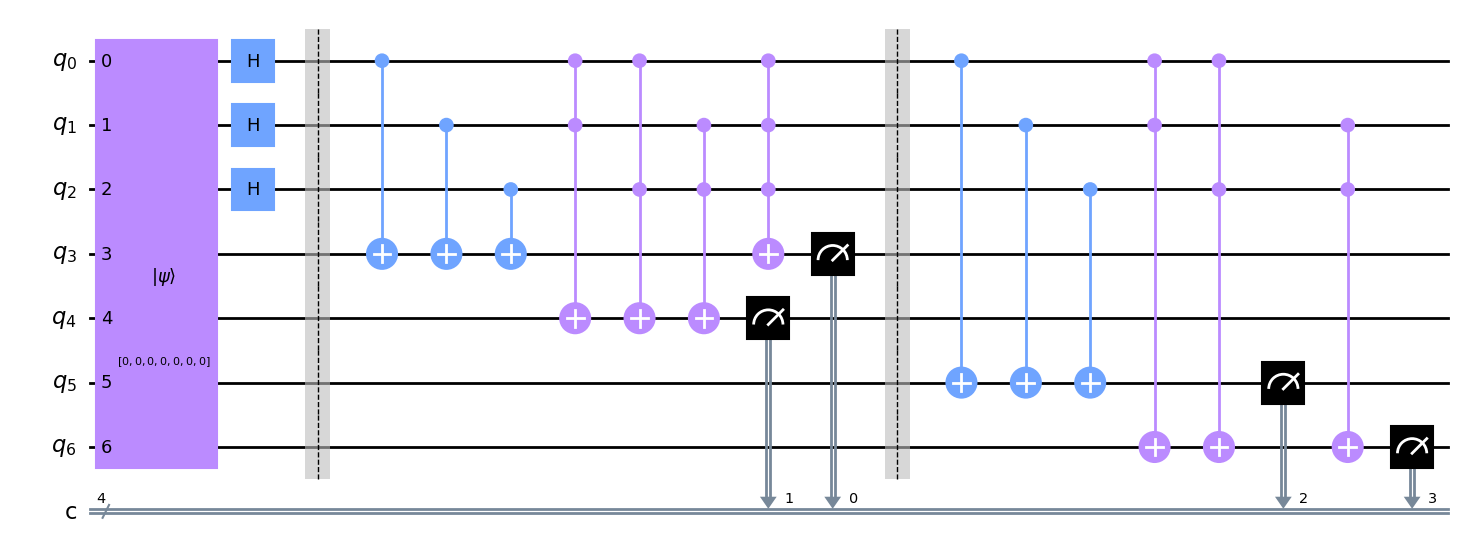

In [ ]:
circuit = QuantumCircuit(7,4)
qc = initialize_circuit(circuit)

qc.cx(0,3)
qc.cx(1,3)
qc.cx(2,3)
qc.ccx(0,1,4)
qc.ccx(0,2,4)
qc.ccx(1,2,4)
qc.mct([0,1,2], [3])
qc.measure([3,4],[0,1])
qc.barrier()

qc.cx(0,5)
qc.cx(1,5)
qc.cx(2,5)
qc.ccx(0,1,6)
qc.ccx(0,2,6)
qc.ccx(1,2,6)
qc.measure([5,6], [2,3])

plot_circuit(qc)

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
result_obj = result.get_counts(qc)
print(result_obj)
keys = list(result_obj.keys())

mismatch_list = []
for key in keys:
  if(key[:2] != key[2:]):
    mismatch_list.append(key)

print(mismatch_list)

{'1110': 116, '0101': 394, '1010': 388, '0000': 126}
['1110']


### **Oracle block**

In [ ]:
def find_marked_state():
  qcirc1 = QuantumCircuit(5,2)
  qcirc1.initialize('00000', qcirc1.qubits)
  qcirc2 = QuantumCircuit(5,2)
  qcirc2.initialize('00000', qcirc2.qubits)
  qcirc3 = QuantumCircuit(5,2)
  qcirc3.initialize('00000', qcirc3.qubits)
  qcirc4 = QuantumCircuit(5,2)
  qcirc4.initialize('00000', qcirc4.qubits)
  qcirc5 = QuantumCircuit(5,2)
  qcirc5.initialize('00000', qcirc5.qubits)
  qcirc6 = QuantumCircuit(5,2)
  qcirc6.initialize('00000', qcirc6.qubits)

  qcirc1.x([0])
  qcirc2.x([1])
  qcirc3.x([2])
  qcirc4.x([0])
  qcirc4.x([1])
  qcirc5.x([1])
  qcirc5.x([2])
  qcirc6.x([0])
  qcirc6.x([2])

  qcirc1.barrier()
  qcirc2.barrier()
  qcirc3.barrier()
  qcirc4.barrier()
  qcirc5.barrier()
  qcirc6.barrier()

  wrong_state = set()
  simulator = Aer.get_backend('qasm_simulator')
  result1 = execute(qcirc1, backend=simulator, shots=1).result()
  result_obj1 = result1.get_counts(qcirc1)
  key1 = list(result_obj1.keys())
  if(key1[:2] != key1[2:]):
    wrong_state.add('100')

  result2 = execute(qcirc2, backend=simulator, shots=1).result()
  result_obj2 = result2.get_counts(qcirc2)
  key2 = list(result_obj2.keys())
  if(key2[:2] != key2[2:]):
    wrong_state.add('010')

  result3 = execute(qcirc3, backend=simulator, shots=1).result()
  result_obj3 = result3.get_counts(qcirc3)
  key3 = list(result_obj3.keys())
  if(key3[:2] != key3[2:]):
    wrong_state.add('001')

  result4 = execute(qcirc4, backend=simulator, shots=1).result()
  result_obj4 = result4.get_counts(qcirc4)
  key4 = list(result_obj4.keys())
  if(key4[:2] != key4[2:]):
    wrong_state.add('110')

  result5 = execute(qcirc5, backend=simulator, shots=1).result()
  result_obj5 = result5.get_counts(qcirc5)
  key5 = list(result_obj5.keys())
  if(key5[:2] != key5[2:]):
    wrong_state.add('011')

  result6 = execute(qcirc6, backend=simulator, shots=1).result()
  result_obj6 = result6.get_counts(qcirc6)
  key6 = list(result_obj6.keys())
  if(key6[:2] != key6[2:]):
    wrong_state.add('101')

  return wrong_state

In [ ]:
mismatch_list = []
for key in keys:
  if(key[:2] != key[2:]):
    mismatch_list.append(key)

print(mismatch_list)
marked_state = set()

for mismatch in mismatch_list:
  if(mismatch[:2] == "00"):
    marked_state.add('000')
  if(mismatch[:2] == "11"):
    marked_state.add('111')
  if(mismatch[:2] == "01" or mismatch[:2] == "10"):
    marked_state_temp = find_marked_state()
    marked_state.update(marked_state_temp)

print(marked_state)
wrong_states = []
wrong_states = list(marked_state)
print(wrong_states)

['1110']
{'111'}
['111']


In [ ]:
oracle = QuantumCircuit(3)

for state in wrong_states:
  if(state == '000'):
    oracle.x([0])
    oracle.x([1])
    oracle.x([2])
    oracle.h([2])
    oracle.ccx(0,1,2)
    oracle.h([2])
    oracle.x([0])
    oracle.x([1])
    oracle.x([2])
  if(state == '111'):
    oracle.h([2])
    oracle.ccx(0,1,2)
    oracle.h([2])

### **Grover block**

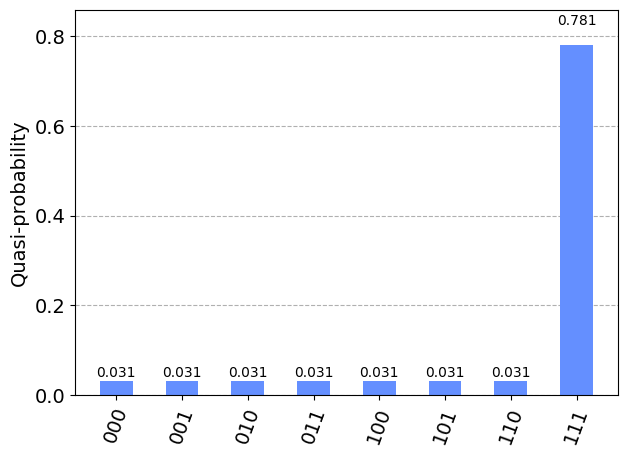

In [ ]:
problem = AmplificationProblem(oracle, is_good_state=wrong_states)
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)

if result is not None:
    display(plot_histogram(result.circuit_results[0]))

### **Rough work**

In [ ]:
def oracle(qc):
  qc.cx(0,5)
  qc.cx(1,5)
  qc.cx(2,5)
  qc.ccx(0,1,6)
  qc.ccx(0,2,6)
  qc.ccx(1,2,6)
  qc.measure([5,6], [2,3])
  return qc

In [ ]:
def grover_circuit(qc):
  qc = oracle(qc)

In [ ]:
circuit = QuantumCircuit(7,4)
circuit = initialize_circuit(circuit)
qcirc = binary_addition_circuit_for_3_qubits(circuit)
qcirc = introduce_error_for_3_qubit_circuit(qcirc)
qcirc.measure([3,4], [0,1])
qcirc.barrier()

test_circuit = QuantumCircuit(5,2)
test_circuit = initialize_circuit(test_circuit)
sut_circuit = binary_addition_circuit_for_3_qubits(test_circuit)
sut_circuit = introduce_error_for_3_qubit_circuit(sut_circuit)

sut_circuit.barrier()
full_circuit = oracle(sut_circuit)

AttributeError: ignored

In [ ]:
plot_circuit(full_circuit)